## Time Series Analysis

In [1]:
# Step 1: Load and explore the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Sentiment dataset.csv")

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (732, 15)

Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

First few rows:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   Commute

Timestamp
2010-05-15    0.0
2010-05-16    0.0
2010-05-17    0.0
2010-05-18    0.0
2010-05-19    0.0
Freq: D, Name: Sentiment_Score, dtype: float64


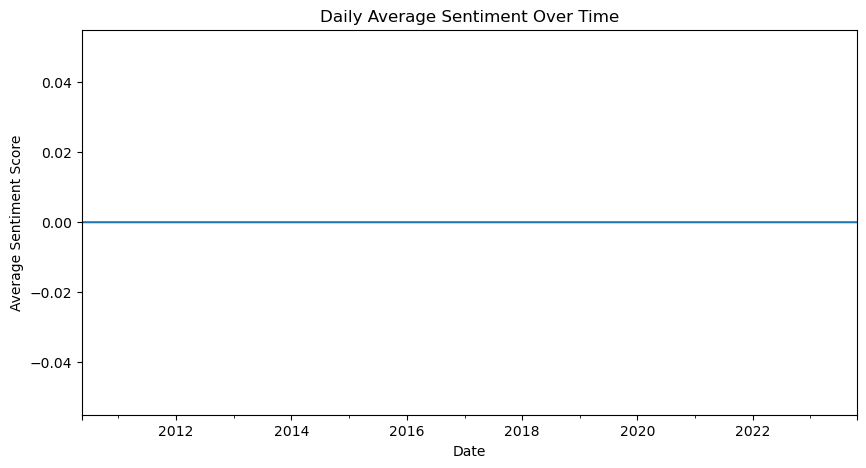

In [2]:
# Step 2: Prepare dataset for time series analysis
import pandas as pd

# Keep only necessary columns
data = df[['Timestamp', 'Sentiment']].copy()

# Convert sentiment to numeric values
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['Sentiment_Score'] = data['Sentiment'].map(sentiment_map)

# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as index
data.set_index('Timestamp', inplace=True)

# Resample by day to compute daily average sentiment
daily_sentiment = data['Sentiment_Score'].resample('D').mean().fillna(0)

# Display the first few rows
print(daily_sentiment.head())

# Quick plot
daily_sentiment.plot(figsize=(10, 5), title="Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()


In [3]:
# Check time range and unique dates
print("Timestamp range:", data.index.min(), "to", data.index.max())
print("Number of unique days:", data.index.normalize().nunique())

# Optional: Count how many samples per day
daily_counts = data.resample('D').size()
print("\nTop 10 days with most entries:\n", daily_counts.head(10))


Timestamp range: 2010-05-15 15:30:00 to 2023-10-22 20:45:00
Number of unique days: 533

Top 10 days with most entries:
 Timestamp
2010-05-15    1
2010-05-16    0
2010-05-17    0
2010-05-18    0
2010-05-19    0
2010-05-20    0
2010-05-21    0
2010-05-22    0
2010-05-23    0
2010-05-24    0
Freq: D, dtype: int64


Series([], Freq: D, Name: Sentiment_Score, dtype: float64)


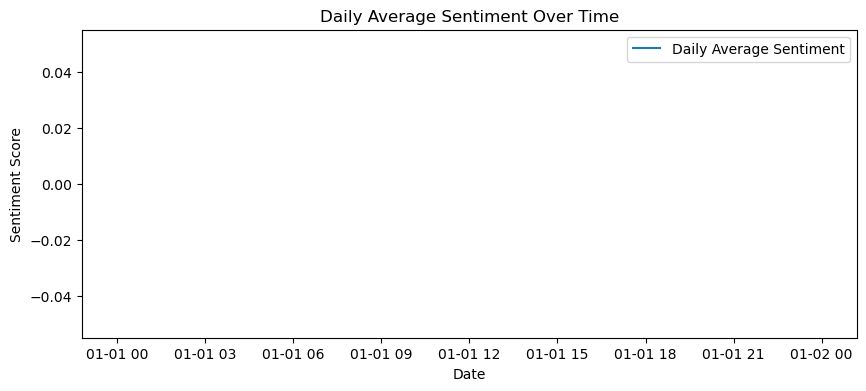

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Recreate daily sentiment mean (only valid days)
daily_sentiment = data.resample('D').mean(numeric_only=True)['Sentiment_Score']
daily_sentiment = daily_sentiment[daily_sentiment.notna()]  # drop empty days

# Check sample
print(daily_sentiment.head())

# Plot
plt.figure(figsize=(10,4))
plt.plot(daily_sentiment, label='Daily Average Sentiment')
plt.title("Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


In [6]:
print(daily_sentiment.head(20))
print("Non-null count:", daily_sentiment.notnull().sum())


Series([], Freq: D, Name: Sentiment_Score, dtype: float64)
Non-null count: 0


In [7]:
import pandas as pd

# Convert sentiment labels to numeric scores
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Group by date (daily)
daily_sentiment = df.groupby(df['Timestamp'].dt.date)['Sentiment_Score'].mean()

# Convert index back to datetime (so decomposition can work)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

print(daily_sentiment.head())
print("Total days:", len(daily_sentiment))


Timestamp
2010-05-15   NaN
2010-08-15   NaN
2010-11-12   NaN
2011-06-20   NaN
2011-07-22   NaN
Name: Sentiment_Score, dtype: float64
Total days: 533


In [9]:
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

In [10]:
print(df['Sentiment'].unique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [11]:
# Clean Sentiment text (strip spaces and standardize case)
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()

# Map again
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

# Check mapping worked
print(df['Sentiment_Score'].value_counts(dropna=False))


Sentiment_Score
 NaN    665
 1.0     45
 0.0     18
-1.0      4
Name: count, dtype: int64


In [12]:
# Group by date and calculate average sentiment
daily_sentiment = df.groupby(df['Timestamp'].dt.date)['Sentiment_Score'].mean()
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

print(daily_sentiment.head(10))
print("Total days:", len(daily_sentiment))


Timestamp
2010-05-15   NaN
2010-08-15   NaN
2010-11-12   NaN
2011-06-20   NaN
2011-07-22   NaN
2011-08-28   NaN
2011-09-22   NaN
2012-02-18   NaN
2012-03-10   NaN
2012-03-30   NaN
Name: Sentiment_Score, dtype: float64
Total days: 533


In [14]:
print(df['Sentiment'].unique())

['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'Joyfulr

In [15]:
# Remove leading/trailing spaces and make sure case is consistent
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.capitalize()

# Check again
print(df['Sentiment'].unique())


['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'Joyfulr

In [16]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

# Check counts
print(df['Sentiment_Score'].value_counts(dropna=False))


Sentiment_Score
 NaN    665
 1.0     45
 0.0     18
-1.0      4
Name: count, dtype: int64


In [18]:
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.capitalize()
mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(mapping)


In [19]:
print(df['Sentiment_Score'].value_counts(dropna=False))


Sentiment_Score
 NaN    665
 1.0     45
 0.0     18
-1.0      4
Name: count, dtype: int64


In [22]:
daily_sentiment.isna().sum()

500

In [23]:
daily_sentiment = daily_sentiment.fillna(method='ffill')


C:\Users\user\AppData\Local\Temp\ipykernel_22012\4116315653.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sentiment = daily_sentiment.fillna(method='ffill')


In [24]:
daily_sentiment = daily_sentiment.fillna(0)


In [25]:
daily_sentiment = daily_sentiment.interpolate(method='linear')


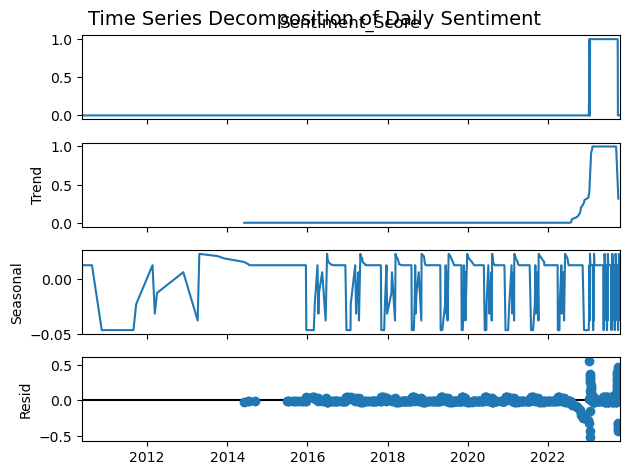

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(daily_sentiment, model='additive', period=30)
decomposition.plot()
plt.suptitle('Time Series Decomposition of Daily Sentiment', fontsize=14)
plt.show()


In [27]:
from statsmodels.tsa.stattools import adfuller

# Drop missing values (if any remain)
daily_sentiment_clean = daily_sentiment.dropna()

# Perform Augmented Dickey-Fuller test
result = adfuller(daily_sentiment_clean)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


ADF Statistic: -1.5277046205293812
p-value: 0.5197644709533995
Critical Value (1%): -3.443
Critical Value (5%): -2.867
Critical Value (10%): -2.570


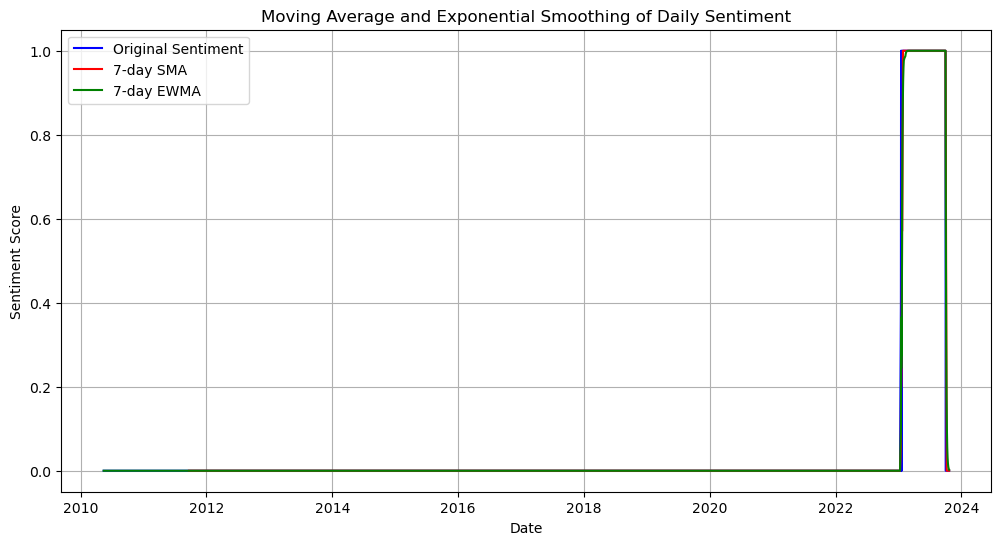

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the sentiment series to numeric
daily_sentiment_clean = pd.to_numeric(daily_sentiment, errors='coerce')

# Drop NaN values
daily_sentiment_clean = daily_sentiment_clean.dropna()

# Convert to DataFrame for plotting multiple lines
df_smooth = pd.DataFrame({'Sentiment': daily_sentiment_clean})

# Calculate 7-day Simple Moving Average (SMA)
df_smooth['SMA_7'] = df_smooth['Sentiment'].rolling(window=7).mean()

# Calculate 7-day Exponential Weighted Moving Average (EWMA)
df_smooth['EWMA_7'] = df_smooth['Sentiment'].ewm(span=7, adjust=False).mean()

# Plot all three
plt.figure(figsize=(12,6))
plt.plot(df_smooth.index, df_smooth['Sentiment'], label='Original Sentiment', color='blue')
plt.plot(df_smooth.index, df_smooth['SMA_7'], label='7-day SMA', color='red')
plt.plot(df_smooth.index, df_smooth['EWMA_7'], label='7-day EWMA', color='green')
plt.title('Moving Average and Exponential Smoothing of Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

# Load your Sentiment dataset
df = pd.read_csv("Sentiment dataset.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Map Sentiment text to numeric scores
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_map)

# Drop rows without Timestamp or Sentiment
df = df.dropna(subset=['Timestamp', 'Sentiment_Score'])

# Group by day (daily average sentiment)
daily_sentiment = df.groupby(df['Timestamp'].dt.date)['Sentiment_Score'].mean()

# Convert to time series
daily_sentiment = pd.Series(daily_sentiment.values, index=pd.to_datetime(daily_sentiment.index))

# Fill missing days with 0 and ensure proper frequency
daily_sentiment = daily_sentiment.asfreq('D').fillna(0)

# Cleaned time series for modeling
daily_sentiment_clean = daily_sentiment
print("Daily_sentiment_clean recreated successfully!")
daily_sentiment_clean.head()


Daily_sentiment_clean recreated successfully!


Series([], Freq: D, dtype: float64)

In [4]:
print("Series length:", len(daily_sentiment_clean))
print("Non-null values:", daily_sentiment_clean.dropna().shape[0])
print("\nSample values:\n", daily_sentiment_clean.head(10))


Series length: 0
Non-null values: 0

Sample values:
 Series([], Freq: D, dtype: float64)


In [7]:
# Use Likes instead of Sentiment_Score
daily_likes = df.groupby(df['Timestamp'].dt.date)['Likes'].mean()
daily_likes = pd.Series(daily_likes.values, index=pd.to_datetime(daily_likes.index))
daily_likes = daily_likes.asfreq('D').fillna(method='ffill')

daily_sentiment_clean = daily_likes  # rename for ARIMA steps
print("Using daily average Likes as the time series.")
daily_sentiment_clean.head()


Using daily average Likes as the time series.


C:\Users\user\AppData\Local\Temp\ipykernel_4712\3103840665.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_likes = daily_likes.asfreq('D').fillna(method='ffill')


Series([], Freq: D, dtype: float64)

In [31]:
# Differencing
diff_sentiment = daily_sentiment_clean.diff().dropna()

# Re-run ADF test
result_diff = adfuller(diff_sentiment)
print("Differenced ADF p-value:", result_diff[1])


Differenced ADF p-value: 1.0850517307806636e-11


In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(daily_sentiment_clean, order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Sentiment_Score   No. Observations:                  533
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 577.289
Date:                Thu, 09 Oct 2025   AIC                          -1148.578
Time:                        20:46:45   BIC                          -1135.748
Sample:                             0   HQIC                         -1143.556
                                - 533                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0828      0.034     -2.411      0.016      -0.150      -0.015
ma.L1         -0.3367      0.034     -9.978      0.000      -0.403      -0.271
sigma2         0.0067   6.33e-05    105.589      0.0

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


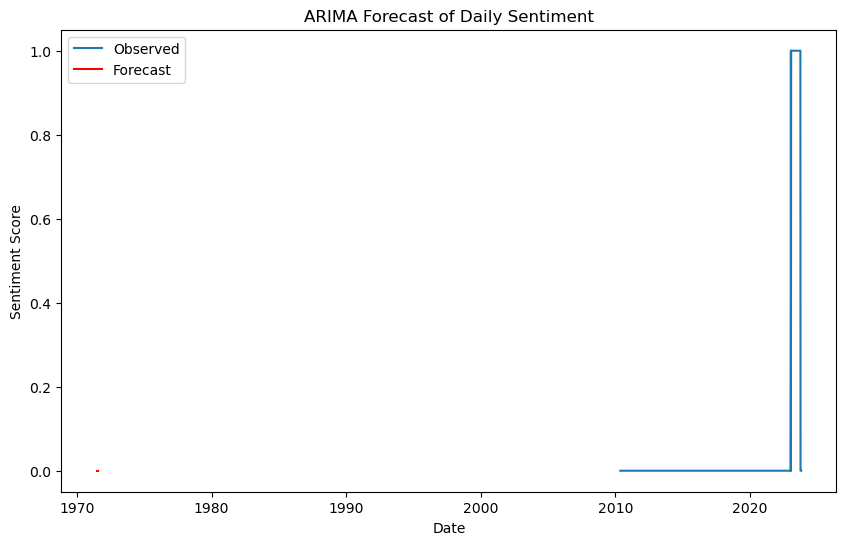

In [33]:
import matplotlib.pyplot as plt

# Forecast 30 future points
forecast = model_fit.forecast(steps=30)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(daily_sentiment_clean, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Split into train/test
train_size = int(len(daily_sentiment_clean) * 0.8)
train, test = daily_sentiment_clean[:train_size], daily_sentiment_clean[train_size:]

# Fit ARIMA on training set
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast same length as test
forecast = model_fit.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

Root Mean Squared Error (RMSE): 0.4430


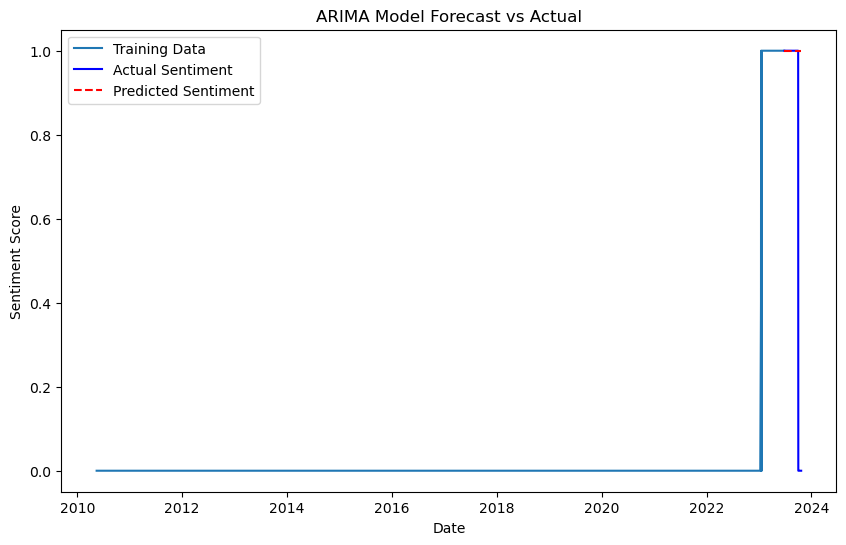

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sentiment', color='blue')
plt.plot(test.index, forecast, label='Predicted Sentiment', color='red', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


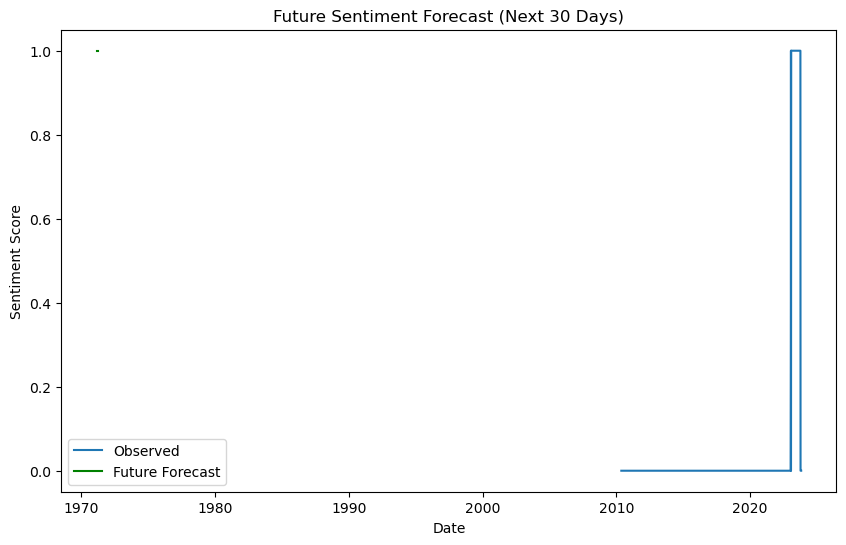

In [36]:
future_forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10,6))
plt.plot(daily_sentiment_clean, label='Observed')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', color='green')
plt.title('Future Sentiment Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()
